In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

In [4]:
rintin = cv2.imread("RinTinTin.jpg")

In [5]:
rintin.shape

(240, 320, 3)

In [6]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [7]:
rintin_gray.shape

(240, 320)

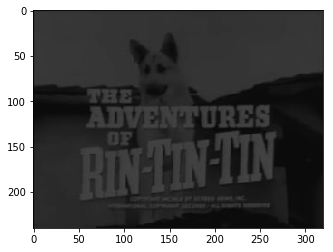

In [8]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

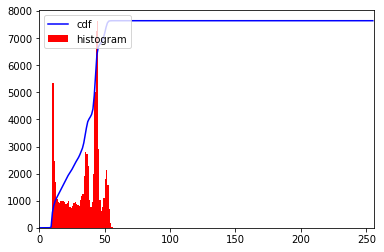

In [9]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

### 1.1

O histograma não aproveita bem por conta da imagem apenas utilizar uma pequena parte da faixa de cor.

### 1.2

In [10]:
rintin_gray.min()

8

In [11]:
rintin_gray -= rintin_gray.min()
rintin_gray.min()

0

In [12]:
rintin_lit = rintin_gray/ rintin_gray.max() * 255
print(rintin_lit.min(), rintin_lit.max())

0.0 255.0


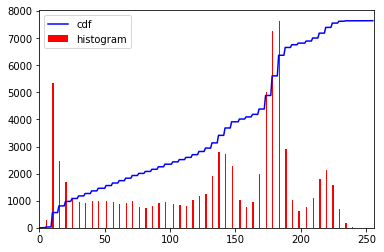

In [13]:
hist,bins = np.histogram(rintin_lit.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_lit.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### 1.3

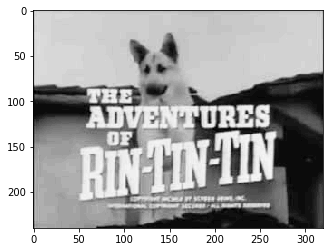

In [14]:
plt.imshow(rintin_lit, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


### 2.1

Somente com a análise dos histogramas dos canais R e B não é possível identificar qualquer uma das caixas.

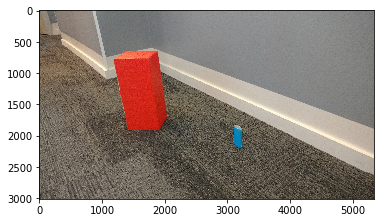

In [15]:
BGR_box = cv2.imread("hall_box_battery1.jpg")

RGB_box= cv2.cvtColor(BGR_box, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_box)
plt.show()

In [16]:
RGB_box.shape

(3006, 5344, 3)

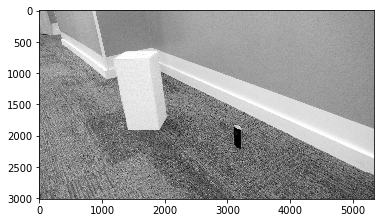

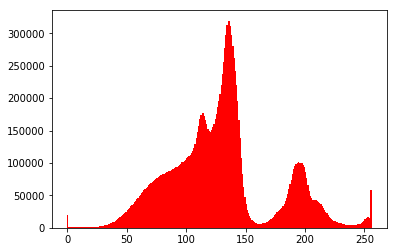

In [17]:
R_box= RGB_box[:, :, 0]

plt.imshow(R_box, cmap='Greys_r')
plt.show()

plt.hist(R_box.flatten(),256,[0,256], color = 'r')

plt.show()


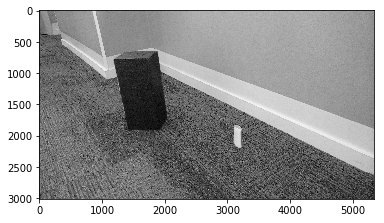

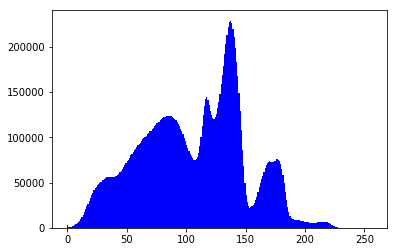

In [18]:
B_box= RGB_box[:, :, 2]

plt.imshow(B_box, cmap='Greys_r')
plt.show()
plt.hist(B_box.flatten(),256,[0,256], color = 'b')

plt.show()

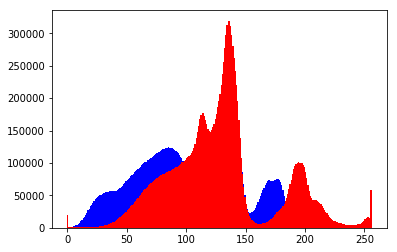

In [20]:
plt.hist(B_box.flatten(),256,[0,256], color = 'b')
plt.hist(R_box.flatten(),256,[0,256], color = 'r')
plt.show()

### 2.2



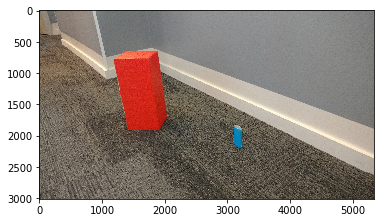

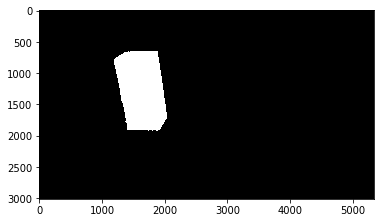

In [29]:
HSV_box = cv2.cvtColor(RGB_box, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(HSV_box, np.array([110,120,50]), np.array([130,255,255]))

plt.imshow(RGB_box)
plt.show()
plt.imshow(mask, cmap='Greys_r')
plt.show()